In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ProjetoFinal2") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/24 15:37:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Carregar o arquivo CSV em um DataFrame 
df = spark.read.option("header", "true").csv("/Users/tiagosilva/Air_Traffic_Passenger_Statistics.csv")

In [27]:
# Vamos calcular as médias e desvios padrão por diferentes categorias

# Número de passageiros por ano
group_by_year = df.groupBy('Year').agg({'Passenger Count': 'avg', 'Passenger Count': 'stddev'}).toPandas()

# Número de passageiros por mês
group_by_month = df.groupBy('Month').agg({'Passenger Count': 'avg', 'Passenger Count': 'stddev'}).toPandas()

# Número de passageiros por companhia aérea
group_by_airline = df.groupBy('Operating Airline').agg({'Passenger Count': 'avg', 'Passenger Count': 'stddev'}).toPandas()

# Número de passageiros por tipo de atividade
group_by_activity = df.groupBy('Activity Type Code').agg({'Passenger Count': 'avg', 'Passenger Count': 'stddev'}).toPandas()

# Número de passageiros por terminal
group_by_terminal = df.groupBy('Terminal').agg({'Passenger Count': 'avg', 'Passenger Count': 'stddev'}).toPandas()

# Exibir as tabelas 
print("Passenger Count per Year")
display(group_by_year)

print("\nPassenger Count per Month")
display(group_by_month)

print("\nPassenger Count per Airline")
display(group_by_airline)

print("\nPassenger Count per Activity Type")
display(group_by_activity)

print("\nPassenger Count per Terminal")
display(group_by_terminal)

Passenger Count per Year


,Year,stddev(Passenger Count)
0,2016,56351.917740
1,2012,58612.368565
2,2014,63694.367863
3,2013,69500.204900
4,2005,54774.384143
5,2009,55096.042750
6,2006,53418.138270
7,2011,57938.886804
8,2008,50774.227360
9,2007,52686.333023



Passenger Count per Month


,Month,stddev(Passenger Count)
0,october,60490.122931
1,may,59000.174363
2,september,58236.294885
3,august,65568.506551
4,april,56293.933065
5,november,56175.549821
6,july,65309.479557
7,january,51294.880080
8,february,47569.006999
9,march,57519.653387



Passenger Count per Airline


,Operating Airline,stddev(Passenger Count)
0,airtran airways,6649.343369
1,alaska airlines,16964.719659
2,taca,1107.020808
3,china airlines,1312.009776
4,all nippon airways,729.615277
...,...,...
72,atlantic southeast airlines,805.748803
73,united airlines - pre 07/01/2013,101345.432519
74,jet airways,1761.469868
75,american airlines,22044.236527



Passenger Count per Activity Type


,Activity Type Code,stddev(Passenger Count)
0,thru / transit,2119.791563
1,deplaned,59618.274481
2,enplaned,59876.051661



Passenger Count per Terminal


,Terminal,stddev(Passenger Count)
0,other,12.090235
1,terminal 1,39319.262515
2,terminal 2,62710.950791
3,terminal 3,120681.064977
4,international,14843.006461


In [5]:
import pandas as pd

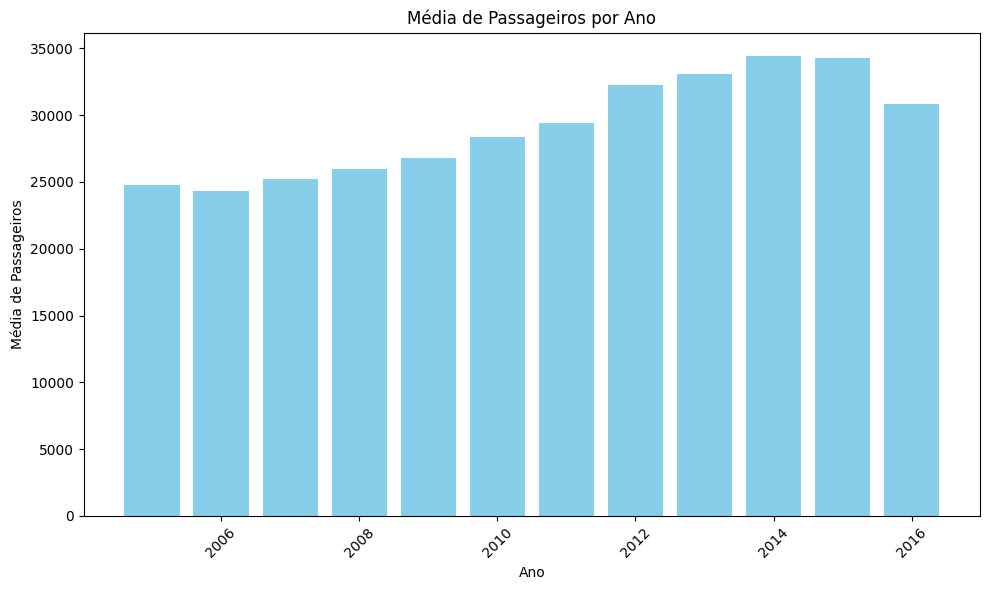

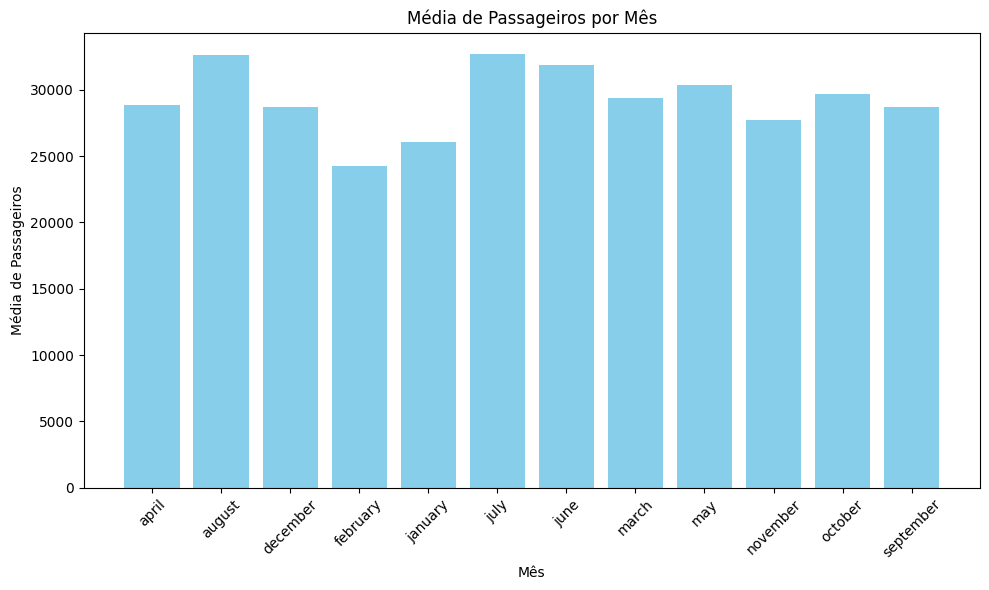

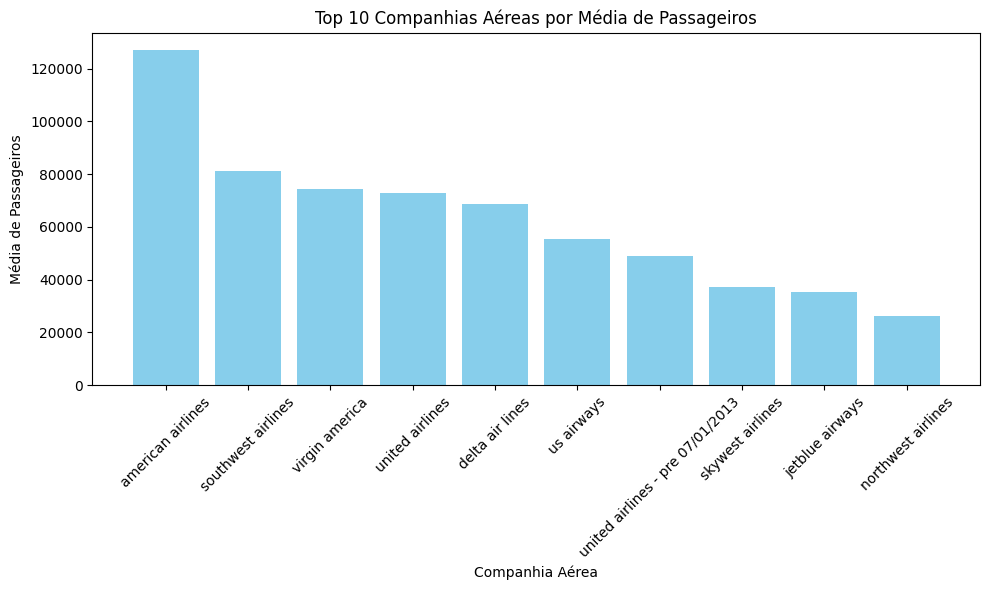

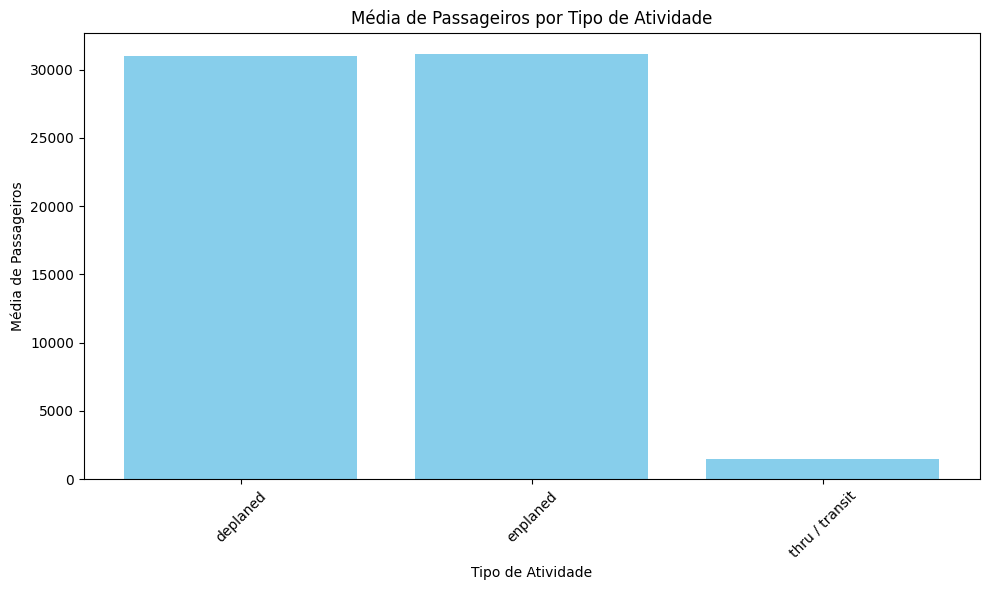

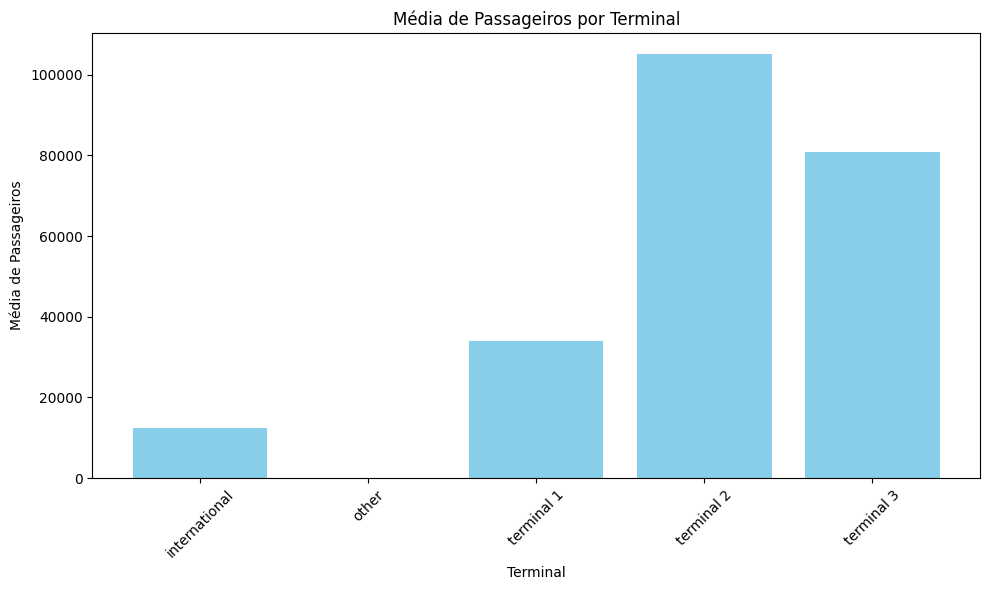

In [14]:
# Para usar Pandas e gerar gráficos, convertemos o DataFrame PySpark para Pandas
df_pandas = df.toPandas()

# Importar matplotlib
import matplotlib.pyplot as plt

# Função para gerar gráficos de barras e também retornar os dados numericamente
def plot_bar_chart_with_data(dataframe, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(dataframe[x_col], dataframe[y_col], color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return dataframe[[x_col, y_col]]

# Converter as colunas numéricas corretamente (garantir que a conversão de texto para número está correta)
df_pandas['Passenger Count'] = pd.to_numeric(df_pandas['Passenger Count'], errors='coerce')
df_pandas['Year'] = pd.to_numeric(df_pandas['Year'], errors='coerce')

# 1. Número de passageiros por ano
group_by_year = df_pandas.groupby('Year')['Passenger Count'].agg(['mean']).reset_index()
numerical_data_year = plot_bar_chart_with_data(group_by_year, 'Year', 'mean', 'Média de Passageiros por Ano', 'Ano', 'Média de Passageiros')

# 2. Número de passageiros por mês
group_by_month = df_pandas.groupby('Month')['Passenger Count'].agg(['mean']).reset_index()
numerical_data_month = plot_bar_chart_with_data(group_by_month, 'Month', 'mean', 'Média de Passageiros por Mês', 'Mês', 'Média de Passageiros')

# 3. Número de passageiros por companhia aérea (Top 10)
group_by_airline = df_pandas.groupby('Operating Airline')['Passenger Count'].agg(['mean']).reset_index()
top_10_airlines = group_by_airline.sort_values(by='mean', ascending=False).head(10)
numerical_data_airlines = plot_bar_chart_with_data(top_10_airlines, 'Operating Airline', 'mean', 'Top 10 Companhias Aéreas por Média de Passageiros', 'Companhia Aérea', 'Média de Passageiros')

# 4. Número de passageiros por tipo de atividade
group_by_activity = df_pandas.groupby('Activity Type Code')['Passenger Count'].agg(['mean']).reset_index()
numerical_data_activity = plot_bar_chart_with_data(group_by_activity, 'Activity Type Code', 'mean', 'Média de Passageiros por Tipo de Atividade', 'Tipo de Atividade', 'Média de Passageiros')

# 5. Número de passageiros por terminal
group_by_terminal = df_pandas.groupby('Terminal')['Passenger Count'].agg(['mean']).reset_index()
numerical_data_terminal = plot_bar_chart_with_data(group_by_terminal, 'Terminal', 'mean', 'Média de Passageiros por Terminal', 'Terminal', 'Média de Passageiros')


In [5]:
# Carregar o arquivo CSV em um DataFrame 
df = spark.read.option("header", "true").csv("/Users/tiagosilva/Air_Traffic_Passenger_Statistics.csv")

In [6]:
from pyspark.ml.feature import StringIndexer

# Verificar o esquema do DataFrame
df.printSchema()

# Codificar colunas categóricas que podem ser relevantes para a correlação
categorical_cols = [
    'Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region',
    'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area',
    'Adjusted Activity Type Code', 'Month'
]

# Para cada coluna categórica, aplicar o StringIndexer
for col in categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_Indexed")
    df = indexer.fit(df).transform(df)

# Exibir algumas linhas para verificar as mudanças
df.show(5)

root
 |-- Activity Period: string (nullable = true)
 |-- Operating Airline: string (nullable = true)
 |-- Operating Airline IATA Code: string (nullable = true)
 |-- Published Airline: string (nullable = true)
 |-- Published Airline IATA Code: string (nullable = true)
 |-- GEO Summary: string (nullable = true)
 |-- GEO Region: string (nullable = true)
 |-- Activity Type Code: string (nullable = true)
 |-- Price Category Code: string (nullable = true)
 |-- Terminal: string (nullable = true)
 |-- Boarding Area: string (nullable = true)
 |-- Passenger Count: string (nullable = true)
 |-- Adjusted Activity Type Code: string (nullable = true)
 |-- Adjusted Passenger Count: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)

+---------------+-----------------+---------------------------+-----------------+---------------------------+-------------+----------+------------------+-------------------+----------+-------------+---------------+-----------

24/10/24 15:38:05 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [25]:
# Após codificar, posso calcular a matriz de correlação apenas para colunas numéricas
# Selecionar colunas numéricas para a correlação
numeric_cols = ['Passenger Count', 'Adjusted Passenger Count', 'Year'] + [col + "_Indexed" for col in categorical_cols]

# Criar uma nova tabela apenas com as colunas numéricas
df_numeric = df.select(numeric_cols)

# Converter para Pandas para calcular a correlação (ou usar um método alternativo no PySpark)
df_numeric_pandas = df_numeric.toPandas()

# Calcular a matriz de correlação
correlation_matrix = df_numeric_pandas.corr()

# Exibir a matriz de correlação
print(correlation_matrix)


                                     Passenger Count  \
Passenger Count                             1.000000   
Adjusted Passenger Count                    0.999941   
Year                                        0.060069   
Operating Airline_Indexed                  -0.285452   
Published Airline_Indexed                  -0.273216   
GEO Summary_Indexed                         0.395743   
GEO Region_Indexed                         -0.299917   
Activity Type Code_Indexed                 -0.071423   
Price Category Code_Indexed                 0.065047   
Terminal_Indexed                            0.433388   
Boarding Area_Indexed                       0.344823   
Adjusted Activity Type Code_Indexed        -0.071423   
Month_Indexed                              -0.010581   

                                     Adjusted Passenger Count      Year  \
Passenger Count                                      0.999941  0.060069   
Adjusted Passenger Count                             1.000000  0.